# Evaluation of the CCLM diurnal temperature cycle

Quick and dirty version - to be cleaned up and further developed. 


In [3]:
import valenspy as vp

import xarray as xr
from pathlib import Path
import cdo 
from yaml import safe_load
import os
from eval_functions import *
import warnings

# Turn off all warnings
warnings.filterwarnings('ignore')

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# postprocessing base directory 
postproc_base_dir = "/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/"

src_path = Path("../src/valenspy")


In [4]:

# reference dataset to compare to
model = 'CCLM'

# get lookup file for model
with open(src_path / "ancilliary_data" / Path(model+"_lookup.yml")) as file:
    mod_LOOKUP = safe_load(file)

# secondary list of variables to compare
# cloud characteristics (integrated cloud water, ice, graupel, snow and rain) (NOT YET IN CORDEX_VARIABLES list)
# ERA5-land: surface fluxes: latent heat, sensible heat




### 1. Load CCLM diurnal cycle

In [5]:
# directory with experiments



experiments = ["EUR11_CO_TA_GC_TSO",
               "EUR11_CO_TT_GC_TSO", 
               "EUR11_CO_TT_EC_TSO", 
               "EUR11_NU_TE_GC_TSO", 
               "EUR11_NU_TT_GC_TSO", 
               "EUR11_NU_TT_EC_TSO"]
               
experiment = experiments[0]

In [2]:
# open COSMO data
ds_mod_diurnalcycle = xr.open_dataset("/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC_TSO/T_2M/T_2M_diurnal_mean_1995-1995_5-5.nc")
da_mod_diurnalcycle = ds_mod_diurnalcycle["T_2M"]

NameError: name 'xr' is not defined

In [ ]:
# define bounds 
bounds = {'europe':
                    {'lat_bounds': [70,35], 
                    'lon_bounds': [-15,40]}, 
        'belgium': 
                    {'lat_bounds': [52,49], 
                    'lon_bounds': [2,7]}}

## 2. Calculate diurnal cycle based on ERA5 data

In [ ]:
from valenspy.diagnostic import DiurnalCycle
print(DiurnalCycle.description)

Daily Cycle (Model2Self)
The diurnal cycle of the data.
 Diagnostic function: diurnal_cycle
 Calculate the diurnal cycle of the data. If lat and lon are present, the data is averaged over the spatial dimensions lat and lon.

    Parameters
    ----------
    ds : xr.Dataset
        The data to calculate the diurnal cycle of.

    Returns
    -------
    xr.Dataset
        The diurnal cycle of the data.
    
 Visualization function: plot_diurnal_cycle
 Plot the daily cycle of the data.


In [ ]:
ref_dataset='ERA5'
months_to_analyse = [5]
# start up input manager
manager = vp.InputManager(machine=machine)

# use input manager to load data, defined on settings above
ds_obs = manager.load_data(ref_dataset,variable, period=[1995,1995],freq="hourly",region=region, path_identifiers = ["-hourly-"])

ds_obs_timesel = ds_obs.sel(time=ds_obs['time'].dt.month.isin(months_to_analyse))


File paths found:
/dodrio/scratch/projects/2022_200/project_input/External/observations/era5/belgium/hourly/2m_temperature/era5-hourly-belgium-2m_temperature-1995.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']


In [ ]:

ds_obs_diurnalcycle =  ds_obs_timesel.groupby("time.hour").mean("time")


In [ ]:
da_obs_diurnalcycle = ds_obs_diurnalcycle[variable].rename({'hour':'time'})
da_obs_diurnalcycle['time'] = da_mod_diurnalcycle.time

## 3. Do plotting

In [ ]:
# do selection of individual points (do this in separate notebook.)
# Define the coordinates
d_point_coords = {
    'opwijk'    : (4.18, 50.97), 
    'betrix'    : (5.25, 49.854),
    'north_sea' : (2.465, 51.63),
    'channel'   : (-1.05, 50.14)
}
point_id = 'opwijk'
point_coord = d_point_coords[point_id]



In [ ]:
da_mod_point.time

<xarray.DataArray 'time' (time: 24)> Size: 192B
array(['1995-05-31T00:00:00.000000000', '1995-05-31T01:00:00.000000000',
       '1995-05-31T02:00:00.000000000', '1995-05-31T03:00:00.000000000',
       '1995-05-31T04:00:00.000000000', '1995-05-31T05:00:00.000000000',
       '1995-05-31T06:00:00.000000000', '1995-05-31T07:00:00.000000000',
       '1995-05-31T08:00:00.000000000', '1995-05-31T09:00:00.000000000',
       '1995-05-31T10:00:00.000000000', '1995-05-31T11:00:00.000000000',
       '1995-05-31T12:00:00.000000000', '1995-05-31T13:00:00.000000000',
       '1995-05-31T14:00:00.000000000', '1995-05-31T15:00:00.000000000',
       '1995-05-31T16:00:00.000000000', '1995-05-31T17:00:00.000000000',
       '1995-05-31T18:00:00.000000000', '1995-05-31T19:00:00.000000000',
       '1995-05-31T20:00:00.000000000', '1995-05-31T21:00:00.000000000',
       '1995-05-31T22:00:00.000000000', '1995-05-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 192B 1995-05-31 ... 1995-05-31T23:00:00
    lon        float32 4B ...
    lat        float32 4B ...
    rlon       float32 4B -8.685
    rlat       float32 4B 1.045
    height_2m  float32 4B ...
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

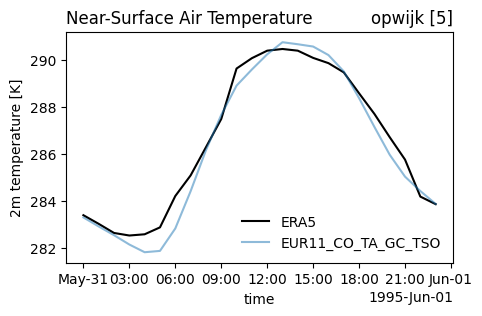

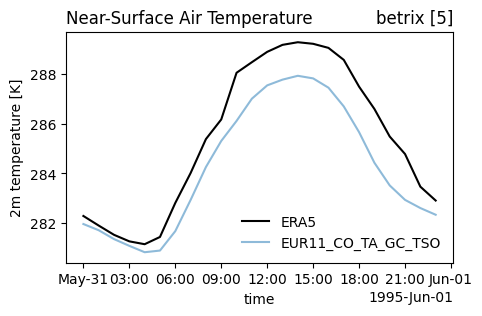

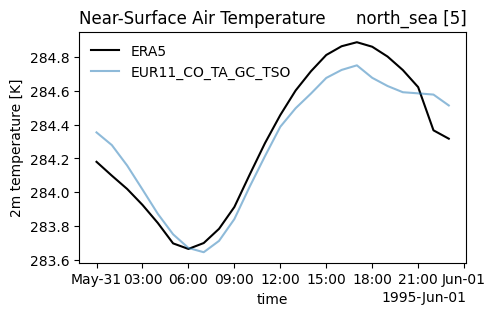

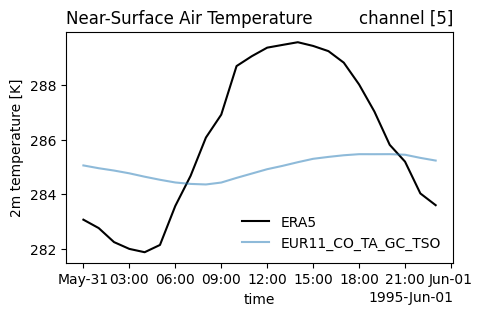

In [ ]:

for point_id in d_point_coords: 
    point_coord = d_point_coords[point_id]

    da_obs_point = da_obs_diurnalcycle.sel(lon=point_coord[0],lat=point_coord[1], method='nearest')

    coord_points_rotated = geo_to_rot(point_coord, ds_mod_diurnalcycle)
    da_mod_point = da_mod_diurnalcycle.sel(rlon = coord_points_rotated[0], rlat = coord_points_rotated[1], method='nearest')


    # do plotting
    fig, ax = plt.subplots(figsize = (5,3))

    da_obs_point.plot(ax=ax, label = ref_dataset, color='k')
    da_mod_point.plot(ax=ax, label = experiment, alpha=0.5)

    ax.legend(frameon=False)

    ax.set_title(da_obs_point.attrs['long_name'], loc='left')
    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} {str(months_to_analyse)}", loc='right'); 

